# Practical Project 2 - Part 3

#### Students:
   - Bonifácio de Oliveira (bldof.eng16@uea.edu.br)
   - Luiz Fábio (lfba.lic17@uea.edu.br)
   - Luiz Felipe (lfda.lic17@uea.edu.br)
   - Rafaela Melo (rmf.lic16@uea.edu.br)

In [34]:
import numpy as np
import pandas as pd
import random
from random import  uniform
import statistics
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sn

# Rosenblatt neuron class

In [45]:
class Neuron:
    
    def __init__(self):
        self.data = np.array([])
        self.x_training = np.array([])
        self.x_test = np.array([])
        
        self.load_data()
        
        self.weights = np.array([
            uniform(-.5, .5),
            uniform(-.5, .5),
            uniform(-.5, .5)
        ])
        
        self.teta = 0
        self.ta   = 0.1
        self.vies = -1
        self.total_of_adjustments = []
        self.epoch = 0
        self.x1 = 0
        self.x2 = 0
        
    def load_data_training_e_teste(self):
        random.shuffle(self.data)

        distribution = int(len(self.data)*0.7)

        self.x_training = self.data[:distribution]
        self.x_test  = self.data[distribution:]
    
    def load_data(self):
        dataset = np.fromfile('dataHoldout.txt')
        rows  = len(dataset)//3
        columns = 3
        self.data = dataset.reshape(rows, columns)
        
        self.load_data_training_e_teste()
    
    def show_graphic(self):
        fig, ax = plt.subplots()
        for i in self.data:
            x = i[0]
            y = i[1]
            yd = int(i[2])
            if(yd >= 1):
                plt.scatter(x,y, color='r', s=8)
            else:
                plt.scatter(x,y, color='b', s=8)

        point1 = [0,self.x1]
        point2 = [self.x2,0]
        x_values = [point1[0], point2[0]]
        y_values = [point1[1], point2[1]]

        ax.plot(x_values, y_values)
        plt.show()
        
    def function_activation(self,num):
        if (num>=self.teta):
            return 1
        else:
            return 0
        
    def perceptron(self):
        adjustment_number = 0
        
        #Embaralha os data
        self.data = list(self.data)
        random.shuffle(self.data)
        self.data = np.array(self.data)
        
        #print("Scrambled data set: \n",self.data,"\n")
        
        for i in self.data:
            
            entrada = np.concatenate((np.array([self.vies]), i[:2]))
            yd = int(i[2:])
            yr = round(entrada.dot(self.weights),4)
            yr = self.function_activation(yr)
            
            adjustment_number += 1
            #print("Dado: ",entrada[1:],"\n")
            self.weights = self.weight_adjustment(yd, yr, entrada)
            
            if(yr != yd):
                self.total_of_adjustments.append(adjustment_number)
                return False
            
        self.total_of_adjustments.append(adjustment_number)
        return True

    def weight_adjustment(self, yd, yr, entrada):
        delta = self.ta * np.array(yd - yr).dot(entrada)
        novos_weights = self.weights + delta
        
        return novos_weights
    
    def find_x1_x2(self):
        w = self.weights
        
        w0_w2 = w[0]/w[2]
        w1_w2 = w[1]/w[2]

        self.x2 = w0_w2 - w1_w2 * 0
        self.x1 = w0_w2/w1_w2
    
    def training(self):
        self.epoch = 1
        print("-----------------------------\nEpoch: ",self.epoch,"\n")
        #100 epoch
        while(self.epoch<100):
            if(self.perceptron() == False):
                self.epoch += 1
                #print("-----------------------------\nEpoch: ",self.epoch,"\n")
            else:
                break
            
        self.find_x1_x2()

        print("Total epoch: ",self.epoch)
        print("Total adjustments made to weights: ",sum(self.total_of_adjustments))
        
n = Neuron()

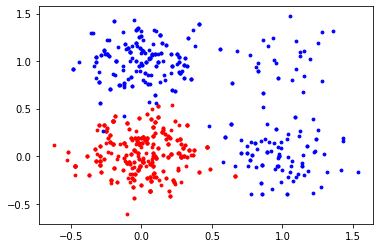

In [46]:
n.show_graphic()

In [47]:
n.data = n.x_training
n.training()

-----------------------------
Epoch:  1 

Total epoch:  100
Total adjustments made to weights:  1259


In [ ]:
n.show_graphic()

In [39]:
def prevision():
    real = []
    provided = []
    hit_number = 0
    error_number   = 0
    for i in n.x_test:
        input_value = np.concatenate((np.array([n.vies]), i[:2]))
        
        yd = int(i[2:])
        yr = round(input_value.dot(n.weights),4)
        yr = n.function_activation(yr)
        
        if(yr == yd):
            hit_number+=1
        else:
            error_number+=1
        
        real.append(yd)
        provided.append(yr)
        
    acc = hit_number/ (hit_number+error_number)
    return hit_number, error_number, real, provided, acc

In [40]:
hit_number, error_number, real, provided, acc = prevision()

In [41]:
print("Number of hits: ", hit_number, "\nNumber of errors: " ,error_number)

Number of hits:  213 
Number of errors:  27


# Matrix of confusion

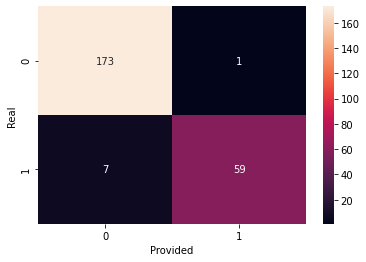

In [23]:
results = {'real': real, 'provided': provided}
results_df = pd.DataFrame.from_dict(results)
confusion_matrix = pd.crosstab(results_df['real'], results_df['provided'], rownames=['Real'], colnames=['Provided'])
sn.heatmap(confusion_matrix, annot=True, fmt="d")
plt.show()

# Accuracy

In [24]:
print("A accuracy é:", acc)

A accuracy é: 0.9666666666666667


In [25]:
 confusion_matrix.values

array([[173,   1],
       [  7,  59]], dtype=int64)

In [26]:
tn = confusion_matrix.values[0][0]
fp = confusion_matrix.values[0][1]
fn = confusion_matrix.values[1][0]
tp = confusion_matrix.values[1][1]
tn, fp, fn, tp

(173, 1, 7, 59)

# Precision

In [29]:
precision = tp/(tp+fp)
print("The precision is:", precision)

The precision is: 0.9833333333333333


# Recall

In [30]:
recall = tp/(tp+fn)
print("The recall is:", recall)

The recall is: 0.8939393939393939


# F-Score

In [32]:
f_score = (2*(precision*recall))/(precision+recall)
print("The F-Score is:", f_score)

The F-Score is: 0.9365079365079364


# Solution Quality

The accuracy of the model trained before the set of tests is 95.83%, of which out of 240 test examples, only 10 had an incorrect output. The accuracy was 0.95, the recall was 0.90, while the F-Score (harmonic mean between accuracy and recall) was 0.93. From these results we can say that the model (under these conditions, considering these weights, the learning rate and the value of ϑ) is satisfactory, with a high accuracy and the F-Score is close to 1, since the model presented only 7 false positives and 3 false negatives.

# Perceptron solution with graphs using training and test data

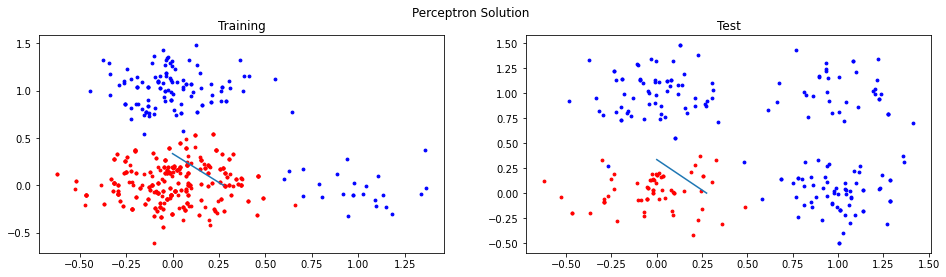

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(4)
fig.set_figwidth(16)

fig.suptitle("Perceptron Solution")
ax1.set_title("Training")
ax2.set_title("Test")

point1 = [0,n.x1]
point2 = [n.x2,0]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]

#training
for i in n.x_training:
    x = i[0]
    y = i[1]
    yd = int(i[2])
    if(yd >= 1):
        ax1.scatter(x,y, color='r', s=8)
    else:
        ax1.scatter(x,y, color='b', s=8)

#test
for i in n.x_test:
    x = i[0]
    y = i[1]
    yd = int(i[2])
    if(yd >= 1):
        ax2.scatter(x,y, color='r', s=8)
    else:
        ax2.scatter(x,y, color='b', s=8)

ax1.plot(x_values, y_values)
ax2.plot(x_values, y_values)
